<a href="https://colab.research.google.com/github/knitinsingh/Burn_classification/blob/master/Identify_Burn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification of Burn depth 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import numpy as np
import sys

from pathlib import Path
from fastai.vision import *
from fastai.callbacks import *
from google.colab import drive
from fastai import *
from torch import cuda

In [0]:
drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/gdrive/My Drive')

Mounted at /content/drive


In [0]:
!pwd

/content


In [0]:
!ls

burn-tv-cur.zip  drive	sample_data


In [0]:
!unzip /content/burn-tv-cur.zip  # Unzip file

Archive:  /content/burn-tv-cur.zip
   creating: burn-tv-cur/
   creating: burn-tv-cur/valid/
   creating: burn-tv-cur/valid/Second degree burn/
  inflating: burn-tv-cur/valid/Second degree burn/diabetes-metabolism-bilateral-feet-5-373-g001.png.jpg  
   creating: __MACOSX/
   creating: __MACOSX/burn-tv-cur/
   creating: __MACOSX/burn-tv-cur/valid/
   creating: __MACOSX/burn-tv-cur/valid/Second degree burn/
  inflating: __MACOSX/burn-tv-cur/valid/Second degree burn/._diabetes-metabolism-bilateral-feet-5-373-g001.png.jpg  
  inflating: burn-tv-cur/valid/Second degree burn/medium_2018-01-22-f16df7d0c0.jpg.jpg  
  inflating: __MACOSX/burn-tv-cur/valid/Second degree burn/._medium_2018-01-22-f16df7d0c0.jpg.jpg  
  inflating: burn-tv-cur/valid/Second degree burn/second-degree-burn-on-woman-hand-finger-with-aloe-vera-gel-treatment-picture-id950489498.jpg.jpg  
  inflating: __MACOSX/burn-tv-cur/valid/Second degree burn/._second-degree-burn-on-woman-hand-finger-with-aloe-vera-gel-treatment-pictur

In [0]:
PATH = "/content/burn-tv-cur" # Setting PATH to burn-tv-cur


In [0]:
path = Path('/content/burn-tv-cur/train')
path.ls()

[PosixPath('/content/burn-tv-cur/train/Second degree burn'),
 PosixPath('/content/burn-tv-cur/train/.DS_Store'),
 PosixPath('/content/burn-tv-cur/train/First degree burn'),
 PosixPath('/content/burn-tv-cur/train/Third degree burn')]

In [0]:
tfms = get_transforms(flip_vert=True)

In [0]:
data64 = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=64).normalize(imagenet_stats)
data128 = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=128).normalize(imagenet_stats)
data256 = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=256).normalize(imagenet_stats)

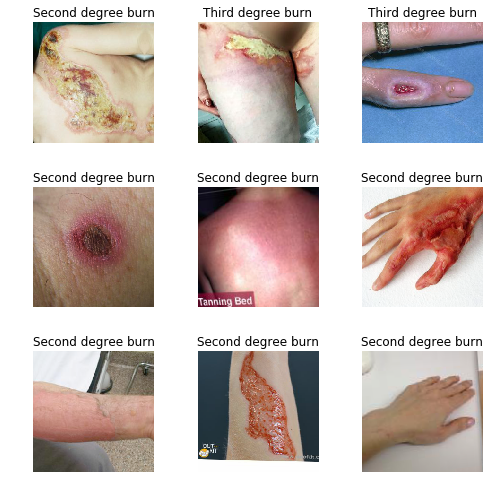

In [0]:
data256.show_batch(rows=3, figsize=(7, 7))


In [0]:
print(data64.classes)

['First degree burn', 'Second degree burn', 'Third degree burn']


In [0]:
import os

Total number of Images in each class

In [0]:
path, dirs, files = next(os.walk("/content/burn-tv-cur/train/Second degree burn"))
file_count = len(files)
print(file_count)

314


In [0]:
path, dirs, files = next(os.walk("/content/burn-tv-cur/train/First degree burn"))
file_count = len(files)
print(file_count)

115


In [0]:
path, dirs, files = next(os.walk("/content/burn-tv-cur/train/Third degree burn"))
file_count = len(files)
print(file_count)

177


In [0]:
learn1 = cnn_learner(data64, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 48824366.35it/s]


In [0]:
learn1.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


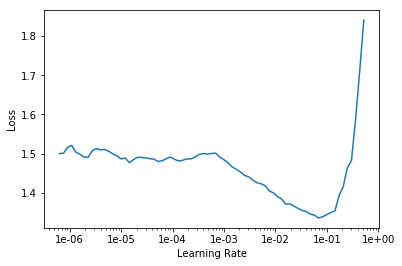

In [0]:
learn1.recorder.plot()


In [0]:
lr = 1e-3
learn1.fit_one_cycle(20, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.996183,0.893624,0.636364,00:13
1,0.972490,0.894545,0.603306,00:13
2,0.963844,0.905729,0.586777,00:13
3,0.948146,0.915201,0.603306,00:13
4,0.938042,0.921338,0.570248,00:13
5,0.939357,0.941175,0.570248,00:13
6,0.943693,0.946557,0.561983,00:13
7,0.921578,0.927620,0.553719,00:13
8,0.917906,0.928482,0.570248,00:13
9,0.908490,0.919203,0.603306,00:13


In [0]:
lr = 1e-2
learn1.fit_one_cycle(50, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.920724,0.928958,0.586777,00:13
1,0.858219,0.933428,0.586777,00:13
2,0.859274,0.938662,0.570248,00:13
3,0.862591,0.977519,0.578512,00:13
4,0.870324,1.017259,0.528926,00:13
5,0.879376,1.048252,0.528926,00:13
6,0.885816,1.068345,0.528926,00:13
7,0.891582,1.039953,0.578512,00:13
8,0.894676,1.074658,0.528926,00:13
9,0.889664,1.060095,0.495868,00:13
